In [1]:
import os

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from PIL import Image
import numpy as np
from keras.utils.vis_utils import plot_model as plot
import matplotlib.pyplot as plt

import sys
import random

Using TensorFlow backend.
/home/hideki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hideki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hideki/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hideki/anaconda3/lib/python3.7/site-packages/tenso

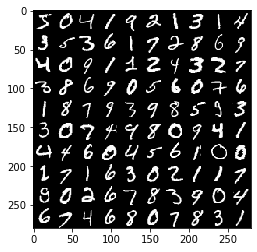

In [2]:
#mnistデータセットイメージ
im = Image.open("mnist.png", "r")
plt.imshow(np.array(im))

訓練ラベル(y_train) ＝ 6
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 034 169 250 040 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 058 242 221 143 017 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 075 247 143 010 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 037 245 184 002 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 008 192 200 014 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 139 247 028 000 000 000 000 0

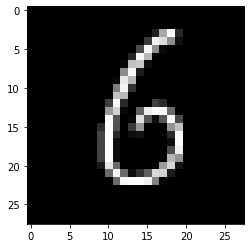

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
#X_trainの画像化とy_trainの値
#1番目のトレーニングの画像データについて調べてみる
train_no = random.randint(0, 100)
 
print('訓練ラベル(y_train) ＝ %d' % y_train[train_no])

for xs in X_train[train_no]:
    for x in xs:
        sys.stdout.write('%03d ' % x)
    sys.stdout.write('\n')

outImg = Image.fromarray(X_train[train_no].reshape((28,28))).convert("RGB")
plt.imshow(np.array(outImg))

In [4]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    
    #学習モデル図の作成
    plot(model, to_file='model.png')

    return model

In [5]:
def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['accuracy'],"o-",label="accuracy")
    plt.plot(history.history['val_accuracy'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()
 
    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
if __name__ == "__main__":
    
    num_classes = 10

    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    
    model = build_model()
    history = model.fit(x_train, y_train,
          batch_size=256,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))
    
    # modelに学習させた時の変化の様子をplot
    plot_history(history)

    # モデルの評価を行う
    score = model.evaluate(x_test, y_test, verbose=1)
    print('Test loss=', score[0])
    print('Test accuracy=', score[1])
    
    # 予測し間違った画像を出力する。
    categories = [ "0","1", "2" , "3", "4" , "5", "6" , "7", "8" , "9"]
    pre = model.predict(x_test)
    
    mistake = "NG_photo"
    os.makedirs(mistake, exist_ok=True)
    for i,v in enumerate(pre):
        pre_ans = v.argmax()
        ans = y_test[i].argmax()
        dat = x_test[i]
        if ans == pre_ans: continue
        fname = mistake + "/" + str(i) + "-" + categories[pre_ans] + \
            "-ne-" + categories[ans] + ".png"
        dat *= 255
        img = Image.fromarray(dat.reshape((28,28))).convert("RGB")
        img.save(fname)
        
    #学習モデルの保存
    model.save('mnist_model.h5')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples

